In [1]:
import pandas as pd

# Ler arquivo Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/calculo_python/pentada_areaDesmatada1.xlsx'
df = pd.read_excel(amazonia)

# Inicializar listas para armazenar resultados
inicio_seca = []
duracao_seca = []
inicio_chuvosa = []

# Pegar todas as colunas de anos, exceto 'Pentada'
anos = df.columns[:-1]

# Loop pelos anos
for ano in anos:
    encontrou_inicio_seca = False
    encontrou_inicio_chuvosa = False

    # Calcular a média anual do ano atual
    media_anual = df[ano].mean()
    
    for i in range(len(df) - 7):
        abaixo_da_media_count = 0
        acima_da_media_count = 0
        
        # Verificar as 8 pentadas a partir da linha atual para a estação seca
        for j in range(8):
            if df.iloc[i + j][ano] < media_anual:
                abaixo_da_media_count += 1
            if df.iloc[i + j][ano] > media_anual:
                acima_da_media_count += 1
        
        # Se 6 ou mais pentadas dentro das 8 estiverem abaixo da média anual e ainda não encontrou o início da seca
        if abaixo_da_media_count >= 6 and not encontrou_inicio_seca:
            num_pentada_seca = df.iloc[i]["Pentada"]
            inicio_seca.append(f'Ano: {ano}, Pentada: {num_pentada_seca} - Início da estação seca')
            encontrou_inicio_seca = True  # Marca que o início da seca foi encontrado para esse ano
            
            # Calcular a duração da estação seca
            duracao = 0
            for k in range(i, len(df)):
                if df.iloc[k][ano] < media_anual:
                    duracao += 1
                else:
                    break  # Para quando uma pentada não está mais abaixo da média
            
            duracao_seca.append(f'Ano: {ano}, Duração da estação seca: {duracao} pentadas')

        # Se já encontrou o início da seca e ainda não encontrou o início da estação chuvosa
        if encontrou_inicio_seca and not encontrou_inicio_chuvosa:
            # Verificar as 8 pentadas a partir da linha atual para a estação chuvosa
            for j in range(8):
                if df.iloc[i + j][ano] > media_anual:  # Corrigido para contar pentadas acima da média
                    acima_da_media_count += 1
            
            # Se 6 ou mais pentadas dentro das 8 estiverem acima da média anual
            if acima_da_media_count >= 6:
                num_pentada_chuvosa = df.iloc[i]["Pentada"]
                inicio_chuvosa.append(f'Ano: {ano}, Pentada: {num_pentada_chuvosa} - Início da estação chuvosa')
                encontrou_inicio_chuvosa = True  # Marca que o início da chuvosa foi encontrado para esse ano

# Imprime os resultados
if inicio_seca:
    for frase in inicio_seca:
        print(frase)

if inicio_chuvosa:
    for frase in inicio_chuvosa:
        print(frase)

if not inicio_seca and not duracao_seca and not inicio_chuvosa:
    print("Erro ao processar a base")


Ano: 2010, Pentada: 18º - Início da estação seca
Ano: 2011, Pentada: 20º - Início da estação seca
Ano: 2012, Pentada: 23º - Início da estação seca
Ano: 2013, Pentada: 18º - Início da estação seca
Ano: 2014, Pentada: 24º - Início da estação seca
Ano: 2010, Pentada: 53º - Início da estação chuvosa
Ano: 2011, Pentada: 56º - Início da estação chuvosa
Ano: 2012, Pentada: 49º - Início da estação chuvosa
Ano: 2013, Pentada: 50º - Início da estação chuvosa
Ano: 2014, Pentada: 50º - Início da estação chuvosa


Ano: 2010, Pentada: 18º - Início da estação seca (Valor: 176199.5542773527)
Ano: 2011, Pentada: 20º - Início da estação seca (Valor: 139748.6221579195)
Ano: 2012, Pentada: 23º - Início da estação seca (Valor: 66448.20954016893)
Ano: 2013, Pentada: 18º - Início da estação seca (Valor: 299728.5240085227)
Ano: 2014, Pentada: 24º - Início da estação seca (Valor: 105260.1271341997)
Ano: 2010, Pentada: 53º - Início da estação chuvosa (Valor: 12396.88754673282)
Ano: 2011, Pentada: 56º - Início da estação chuvosa (Valor: 68786.2485455364)
Ano: 2012, Pentada: 49º - Início da estação chuvosa (Valor: 15557.70649460623)
Ano: 2013, Pentada: 50º - Início da estação chuvosa (Valor: 95751.70509251804)
Ano: 2014, Pentada: 50º - Início da estação chuvosa (Valor: 42907.17247465028)


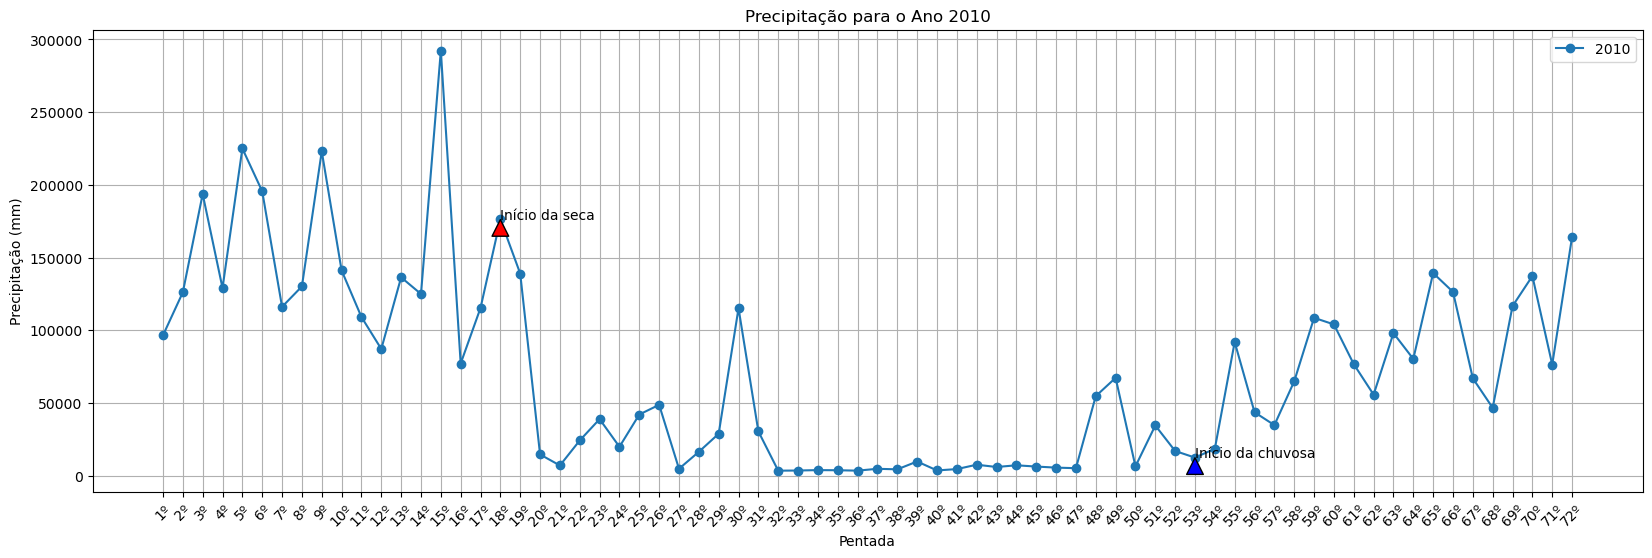

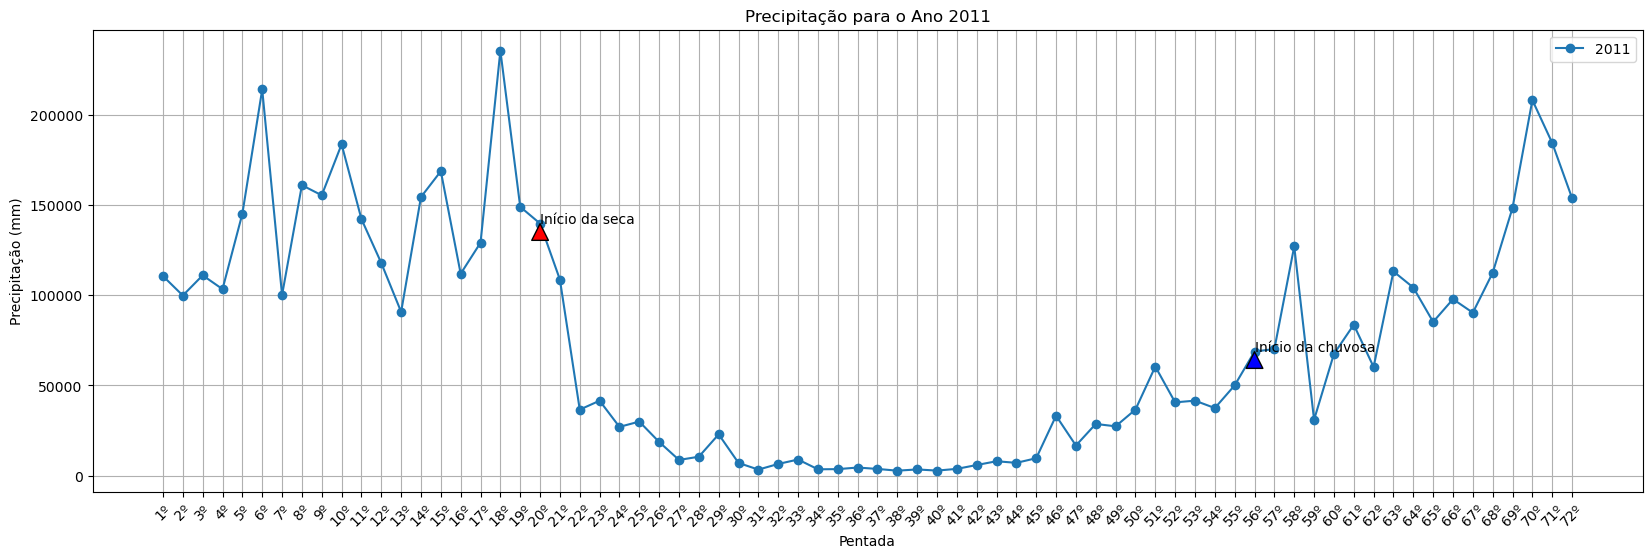

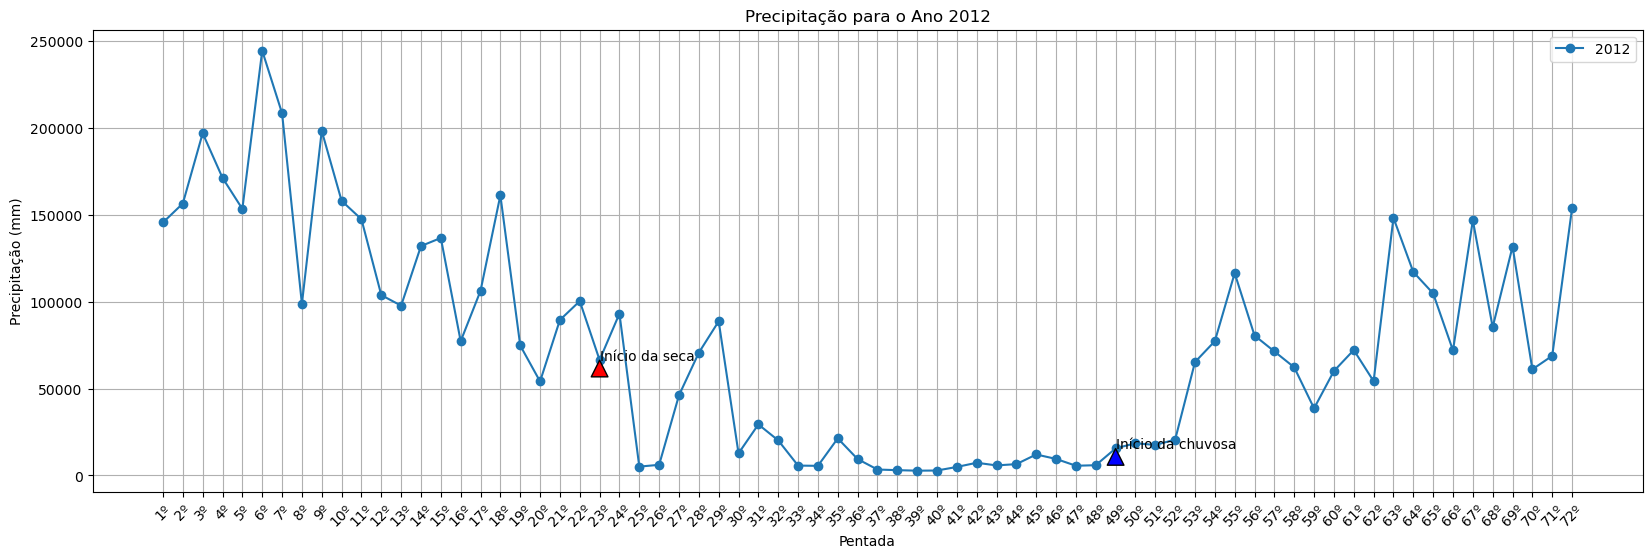

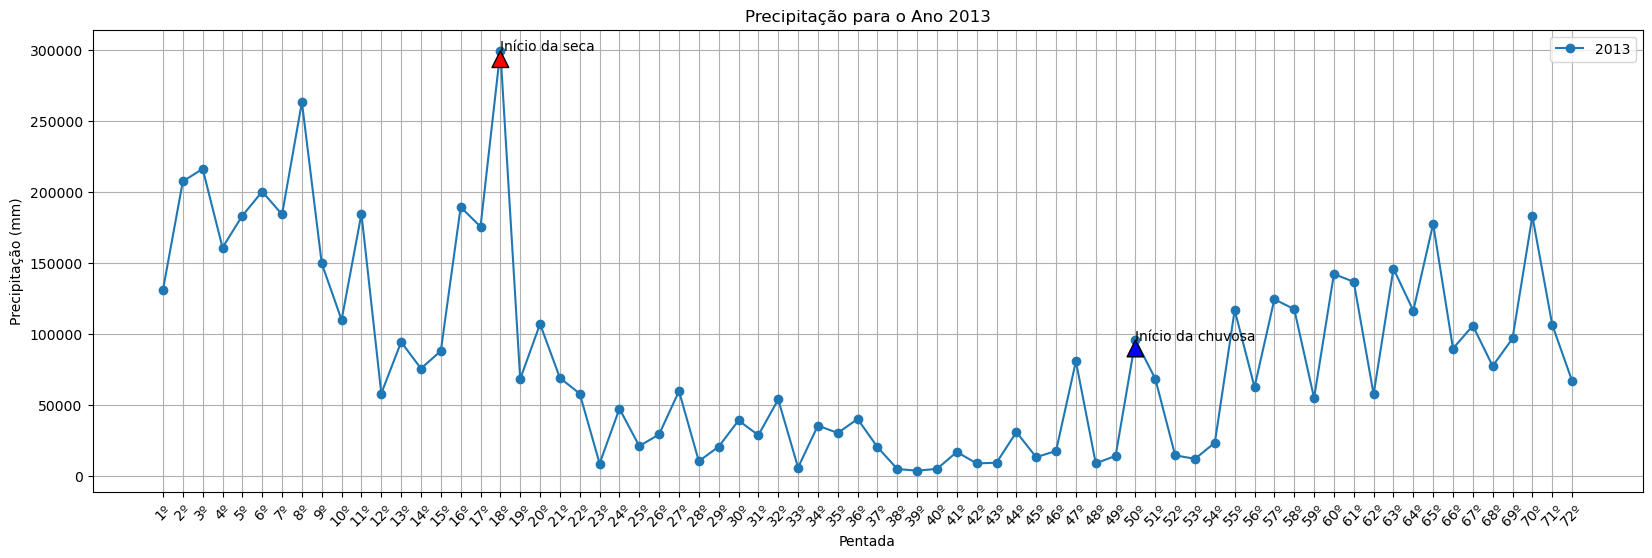

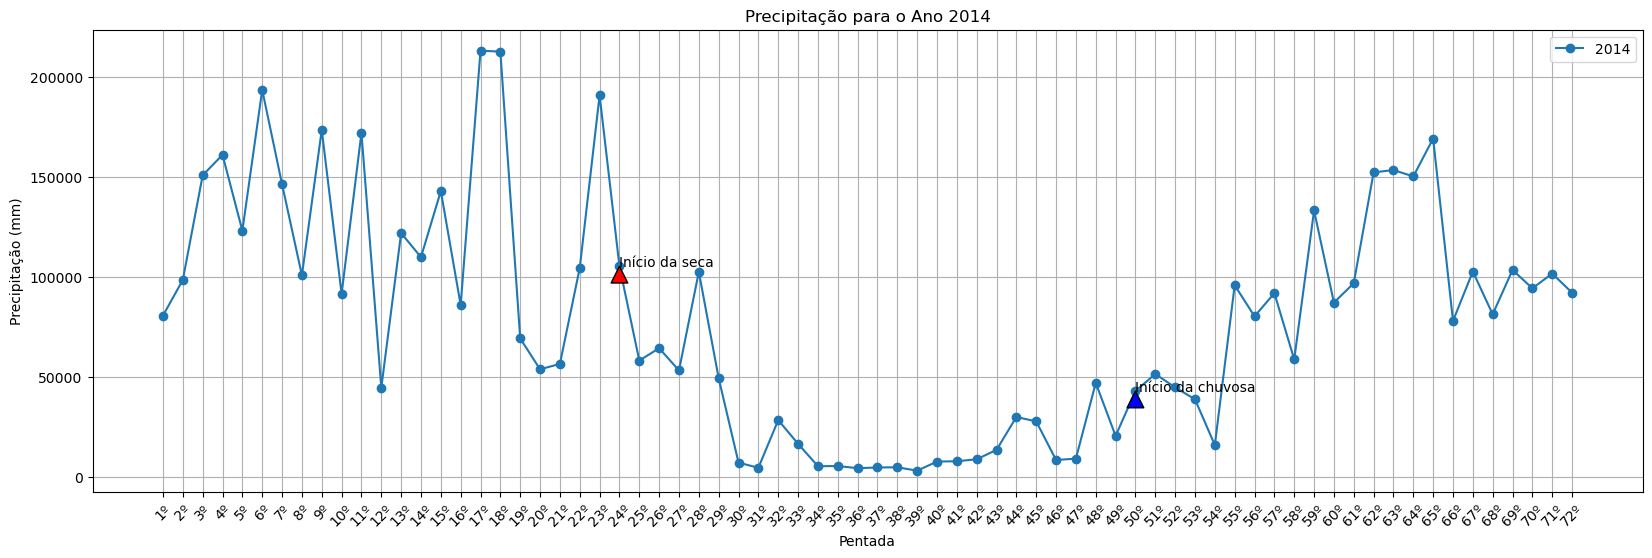

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler arquivo Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/calculo_python/pentada_areaDesmatada1.xlsx'
df = pd.read_excel(amazonia)

# Inicializar listas para armazenar resultados
inicio_seca = []
duracao_seca = []
inicio_chuvosa = []

# Pegar todas as colunas de anos, exceto 'Pentada'
anos = df.columns[:-1]

# Loop pelos anos
for ano in anos:
    encontrou_inicio_seca = False
    encontrou_inicio_chuvosa = False

    # Calcular a média anual do ano atual
    media_anual = df[ano].mean()
    
    for i in range(len(df) - 7):
        abaixo_da_media_count = 0
        acima_da_media_count = 0
        
        # Verificar as 8 pentadas a partir da linha atual para a estação seca
        for j in range(8):
            if df.iloc[i + j][ano] < media_anual:
                abaixo_da_media_count += 1
            if df.iloc[i + j][ano] > media_anual:
                acima_da_media_count += 1
        
        # Se 6 ou mais pentadas dentro das 8 estiverem abaixo da média anual e ainda não encontrou o início da seca
        if abaixo_da_media_count >= 6 and not encontrou_inicio_seca:
            num_pentada_seca = df.iloc[i]["Pentada"]
            inicio_seca.append((ano, num_pentada_seca, df.iloc[i][ano]))  # Armazena o valor também
            encontrou_inicio_seca = True
            
            # Calcular a duração da estação seca
            duracao = 0
            for k in range(i, len(df)):
                if df.iloc[k][ano] < media_anual:
                    duracao += 1
                else:
                    break
            
            duracao_seca.append(f'Ano: {ano}, Duração da estação seca: {duracao} pentadas')

        # Se já encontrou o início da seca e ainda não encontrou o início da estação chuvosa
        if encontrou_inicio_seca and not encontrou_inicio_chuvosa:
            # Verificar as 8 pentadas a partir da linha atual para a estação chuvosa
            for j in range(8):
                if df.iloc[i + j][ano] > media_anual:
                    acima_da_media_count += 1
            
            # Se 6 ou mais pentadas dentro das 8 estiverem acima da média anual
            if acima_da_media_count >= 6:
                num_pentada_chuvosa = df.iloc[i]["Pentada"]
                inicio_chuvosa.append((ano, num_pentada_chuvosa, df.iloc[i][ano]))  # Armazena o valor também
                encontrou_inicio_chuvosa = True

# Imprime os resultados
if inicio_seca:
    for ano, pentada, valor in inicio_seca:
        print(f'Ano: {ano}, Pentada: {pentada} - Início da estação seca (Valor: {valor})')

if inicio_chuvosa:
    for ano, pentada, valor in inicio_chuvosa:
        print(f'Ano: {ano}, Pentada: {pentada} - Início da estação chuvosa (Valor: {valor})')

# Plotar gráfico de linha
for ano in anos:
    plt.figure(figsize=(20, 6))
    plt.plot(df["Pentada"], df[ano], marker='o', label=ano)

    # Adicionar setas para o início da estação seca
    for (ano_sec, pentada_sec, valor_sec) in inicio_seca:
        if ano_sec == ano:
            plt.annotate('Início da seca', 
                         xy=(pentada_sec, valor_sec), 
                         xytext=(pentada_sec, valor_sec + 0.5),
                         arrowprops=dict(facecolor='red', shrink=0.05))

    # Adicionar setas para o início da estação chuvosa
    for (ano_chuv, pentada_chuv, valor_chuv) in inicio_chuvosa:
        if ano_chuv == ano:
            plt.annotate('Início da chuvosa', 
                         xy=(pentada_chuv, valor_chuv), 
                         xytext=(pentada_chuv, valor_chuv + 0.5),
                         arrowprops=dict(facecolor='blue', shrink=0.05))

    plt.title(f'Precipitação para o Ano {ano}')
    plt.xlabel('Pentada')
    plt.xticks(rotation=45)  # Rotacionar as etiquetas do eixo x
    plt.ylabel('Precipitação (mm)')
    plt.legend()
    plt.grid()
    plt.show()


Ano: 2010, Pentada: 18º - Início da estação seca
Ano: 2011, Pentada: 20º - Início da estação seca
Ano: 2012, Pentada: 23º - Início da estação seca
Ano: 2013, Pentada: 18º - Início da estação seca
Ano: 2014, Pentada: 24º - Início da estação seca
Ano: 2010, Pentada: 53º - Início da estação chuvosa
Ano: 2011, Pentada: 56º - Início da estação chuvosa
Ano: 2012, Pentada: 49º - Início da estação chuvosa
Ano: 2013, Pentada: 50º - Início da estação chuvosa
Ano: 2014, Pentada: 50º - Início da estação chuvosa


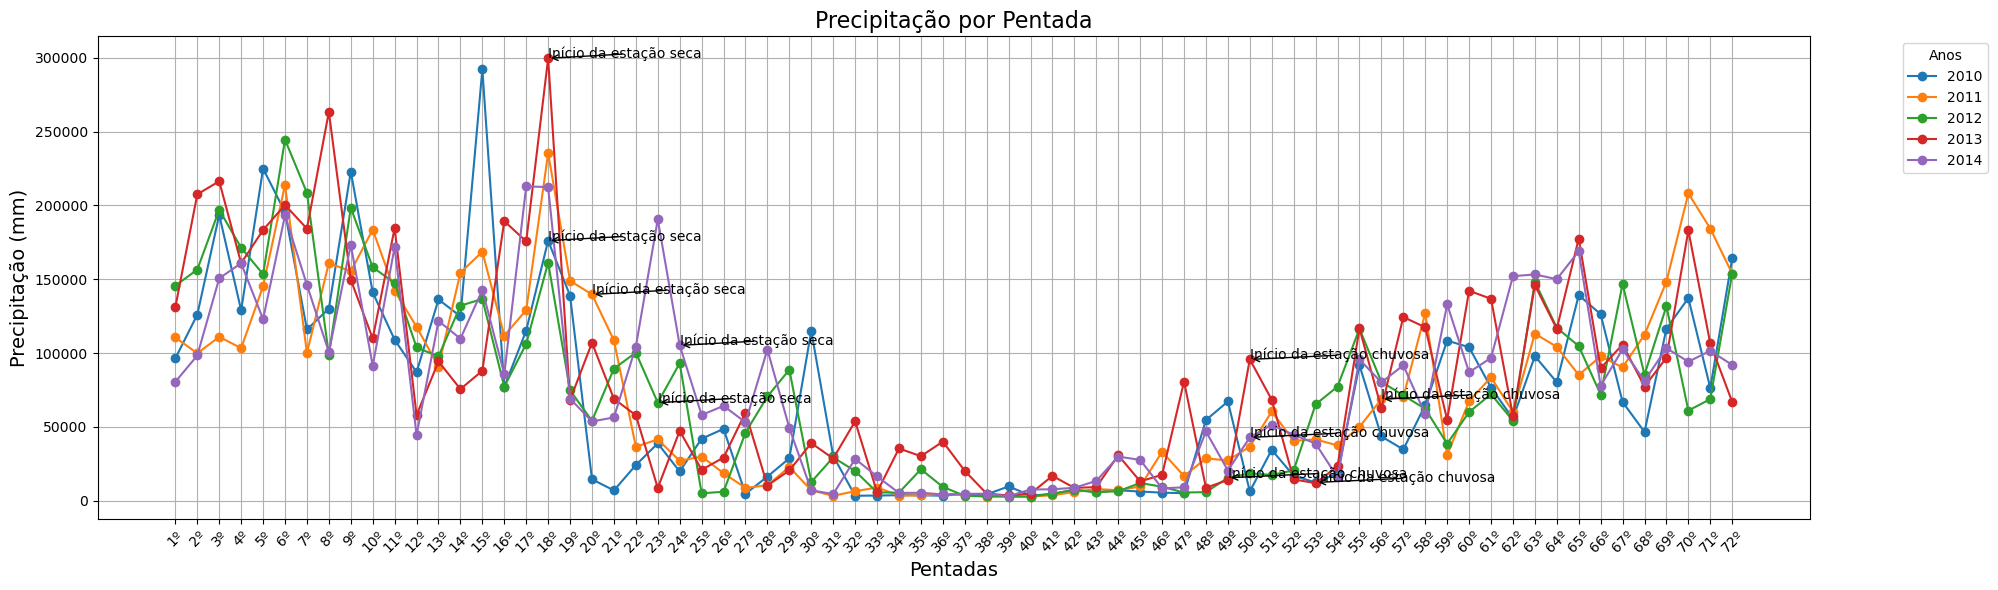

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler arquivo Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/calculo_python/pentada_areaDesmatada1.xlsx'
df = pd.read_excel(amazonia)

# Inicializar listas para armazenar resultados
inicio_seca = []
duracao_seca = []
inicio_chuvosa = []

# Pegar todas as colunas de anos, exceto 'Pentada'
anos = df.columns[:-1]

# Loop pelos anos
for ano in anos:
    encontrou_inicio_seca = False
    encontrou_inicio_chuvosa = False

    # Calcular a média anual do ano atual
    media_anual = df[ano].mean()
    
    for i in range(len(df) - 7):
        abaixo_da_media_count = 0
        acima_da_media_count = 0
        
        # Verificar as 8 pentadas a partir da linha atual para a estação seca
        for j in range(8):
            if df.iloc[i + j][ano] < media_anual:
                abaixo_da_media_count += 1
            if df.iloc[i + j][ano] > media_anual:
                acima_da_media_count += 1
        
        # Se 6 ou mais pentadas dentro das 8 estiverem abaixo da média anual e ainda não encontrou o início da seca
        if abaixo_da_media_count >= 6 and not encontrou_inicio_seca:
            num_pentada_seca = df.iloc[i]["Pentada"]
            inicio_seca.append(f'Ano: {ano}, Pentada: {num_pentada_seca} - Início da estação seca')
            encontrou_inicio_seca = True
            
            # Calcular a duração da estação seca
            duracao = 0
            for k in range(i, len(df)):
                if df.iloc[k][ano] < media_anual:
                    duracao += 1
                else:
                    break
            
            duracao_seca.append(f'Ano: {ano}, Duração da estação seca: {duracao} pentadas')

        # Se já encontrou o início da seca e ainda não encontrou o início da estação chuvosa
        if encontrou_inicio_seca and not encontrou_inicio_chuvosa:
            # Verificar as 8 pentadas a partir da linha atual para a estação chuvosa
            for j in range(8):
                if df.iloc[i + j][ano] > media_anual:
                    acima_da_media_count += 1
            
            # Se 6 ou mais pentadas dentro das 8 estiverem acima da média anual
            if acima_da_media_count >= 6:
                num_pentada_chuvosa = df.iloc[i]["Pentada"]
                inicio_chuvosa.append(f'Ano: {ano}, Pentada: {num_pentada_chuvosa} - Início da estação chuvosa')
                encontrou_inicio_chuvosa = True

# Imprime os resultados
if inicio_seca:
    for frase in inicio_seca:
        print(frase)

if inicio_chuvosa:
    for frase in inicio_chuvosa:
        print(frase)

if not inicio_seca and not duracao_seca and not inicio_chuvosa:
    print("Erro ao processar a base")

# Plotar gráfico
plt.figure(figsize=(20, 6))

# Loop para plotar cada ano
for ano in anos:
    plt.plot(df["Pentada"], df[ano], marker='o', label=ano)

# Adicionar setas indicando o início da estação seca e chuvosa
for sec in inicio_seca:
    ano_seca, pentada_seca = sec.split(" - ")[0].split(", ")
    pentada_index = df[df['Pentada'] == pentada_seca.split(": ")[1]].index[0]
    plt.annotate('Início da estação seca', xy=(pentada_index, df[ano_seca.split(": ")[1]][pentada_index]),
                 xytext=(pentada_index, df[ano_seca.split(": ")[1]][pentada_index] + 1),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

for ch in inicio_chuvosa:
    ano_chuvosa, pentada_chuvosa = ch.split(" - ")[0].split(", ")
    pentada_index = df[df['Pentada'] == pentada_chuvosa.split(": ")[1]].index[0]
    plt.annotate('Início da estação chuvosa', xy=(pentada_index, df[ano_chuvosa.split(": ")[1]][pentada_index]),
                 xytext=(pentada_index, df[ano_chuvosa.split(": ")[1]][pentada_index] + 1),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'))

# Melhorar aparência do gráfico
plt.title('Precipitação por Pentada', fontsize=16)
plt.xlabel('Pentadas', fontsize=14)
plt.ylabel('Precipitação (mm)', fontsize=14)
plt.xticks(rotation=45)  # Rotacionar as etiquetas do eixo x
plt.legend(title='Anos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True)
plt.tight_layout()  # Ajustar layout para melhor visualização

# Exibir o gráfico
plt.show()
